In [61]:
import random
import math
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import rand, randint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import itertools
import statistics


In [128]:
#parameters

n_pop = 30
iteration = 20
w = 0.7
c1 = 0.2
c2 = 0.1
k=5

#variables
gbest=[]
pbest=[]
feature_accuracy=[]
feature_accuracy_index=[]
generation_history=[]
population=list()
velocity=list()
position=list()
features = 13


[0.28381147622336, 0.629431496883359, 0.12158960974586763, 0.9921410594166041, 0.7575321934714124, 0.5259224596952556, 0.898455327631142, 0.5686318266732154, 0.20425344844520466, 0.4583808170323972, 0.8347742230825063, 0.29861750650143104, 0.6532725779804289, 0.8621150284944388, 0.8900184533339167, 0.921597214970552, 0.583685865889298, 0.6427018155030546, 0.425725308674583, 0.05354643581162799, 0.11322200274460859, 0.33952080629326686, 0.6111597706803652, 0.8056248151940888, 0.6366796305521761, 0.6673430374213365, 0.16593366005605847, 0.746494283768096, 0.903240898195929, 0.5317481741858973]
[ Generation  1  ]  1.00
[ Generation  2  ]  0.85
[ Generation  3  ]  0.84
[ Generation  4  ]  0.82
[ Generation  5  ]  0.85
[ Generation  6  ]  0.90
[ Generation  7  ]  1.00
[ Generation  8  ]  1.00
[ Generation  9  ]  1.00
[ Generation  10  ]  1.00
[ Generation  11  ]  1.00
[ Generation  12  ]  1.00
[ Generation  13  ]  0.95
[ Generation  14  ]  0.95
[ Generation  15  ]  0.95
[ Generation  16  ] 

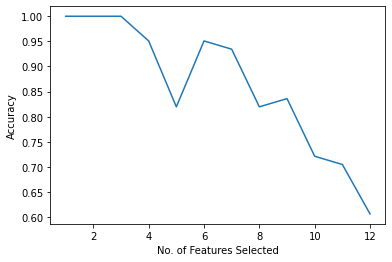

   
1  Feature(s) Selected
     fbs  target  Predicted
225    0       0          0
152    0       1          1
228    0       0          0
201    0       0          0
52     0       1          1
..   ...     ...        ...
146    0       1          1
302    0       0          0
26     1       1          1
108    0       1          1
89     0       1          1

[61 rows x 3 columns]
100.0000 %
   
   
2  Feature(s) Selected
     restecg  exang  target  Predicted
225        1      1       0          0
152        0      0       1          1
228        0      0       0          0
201        0      1       0          0
52         1      0       1          1
..       ...    ...     ...        ...
146        1      0       1          1
302        0      0       0          0
26         1      0       1          1
108        1      0       1          1
89         0      0       1          1

[61 rows x 4 columns]
100.0000 %
     fbs  oldpeak  target  Predicted
225    0      2.6       0        

     age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
225   70    1   0       145   174    0      125      1      2.6      0   0   
152   64    1   3       170   227    0      155      0      0.6      1   0   
228   59    1   3       170   288    0      159      0      0.2      1   0   
201   60    1   0       125   258    0      141      1      2.8      1   1   
52    62    1   2       130   231    0      146      0      1.8      1   3   
..   ...  ...  ..       ...   ...  ...      ...    ...      ...    ...  ..   
146   44    0   2       118   242    0      149      0      0.3      1   1   
302   57    0   1       130   236    0      174      0      0.0      1   1   
26    59    1   2       150   212    1      157      0      1.6      2   0   
108   50    0   1       120   244    0      162      0      1.1      2   0   
89    58    0   0       100   248    0      122      0      1.0      1   0   

     thal  target  Predicted  
225     3       0          0  
1

In [129]:
velocity,position = initialisation(velocity,position)
sigmoid_velocity = attribute_selection(velocity)
selected_population = selected_pop(population)
particle_features_index = feature_index(selected_population)
generation_history.append(particle_features_index)

for iter_ in range(iteration):
    
    #Knn
    pbest_iter=[]
    pbest_iter=feature_selection(feature_index)
    pbest,gbest=p_g_best(pbest,gbest,pbest_iter)
    print("[ Generation ",iter_+1," ] ","%.2f" % gbest[iter_])
    
    #BPSO
    rand1,rand2=random.random(),random.random()
    current_iter=len(gbest)-1
    velocity,position,population = update_postion_particle_population(n_pop,current_iter,rand1,rand2)
    sigmoid_velocity = attribute_selection(velocity)
    selected_population = selected_pop(population)
    particle_features_index = feature_index(selected_population)
    generation_history.append(particle_features_index)

feature_accuracy,feature_accuracy_index=feature_selected_accuracy(feature_accuracy,
                                                                  feature_accuracy_index,features)
plot_res(feature_accuracy,feature_accuracy_index)


In [2]:
#randomize particles and velocity

def initialisation(velocity,position):
    for x in range(n_pop):
        population_row=[]
        for y in range(features):
            population_row.append(random.random())
            if y==0:    
                velocity.append(random.random())
                position.append(random.random())
        population.append(population_row)
    return velocity,position

In [3]:
#attribute selecttion
def attribute_selection(velocity):position
    x = np.array(velocity)
    z = 1/(1 + np.exp(-x))
    sigmoid_velocity = z.tolist()
    return sigmoid_velocity

In [4]:
def selected_pop(population):
    selected_population = list()
    for i,particle in enumerate(population):
        feature_seleced=[]
        for j,attribute in enumerate(particle):
            if attribute > sigmoid_velocity[i]:
                feature_seleced.append(0)
            else:
                feature_seleced.append(1)
        selected_population.append(feature_seleced)
    return selected_population

In [5]:
def feature_index(selected_population):
    iter_ = 1
    particle_features_index = []
    for i in range(iter_):
        for p in selected_population:
            f_index =[]
            for f, one in enumerate(p):
                if one == 1:
                    f_index.append(f)
            particle_features_index.append(f_index)    
    return particle_features_index

In [6]:
def feature_selection(feature_index):
    #feature selection
    pbest_iter=[]
    for i in range(n_pop):
        df = pd.read_csv(r'heart.csv')
        df.drop(df.columns[particle_features_index[i]], axis = 1, inplace = True)
        X_train,X_test,Y_train,Y_test = train_test_split(df,df['target'],test_size=0.2, random_state=0)
        knn = KNeighborsClassifier(n_neighbors=2)
        knn.fit(X_train,Y_train)
        Y_pred=knn.predict(X_test)
        result=pd.concat([X_test,Y_test,pd.Series(Y_pred,name="Predicted",index=X_test.index)], 
                        ignore_index=False, axis=1)
        pbest_iter.append(knn.score(X_test,Y_test))
    return pbest_iter

In [7]:
#finding the pbest and gbest
def p_g_best(pbest,gbest,i):
    pbest.append(i)
    gbest_iter = max(i)
    gbest.append(gbest_iter)
    
    return pbest,gbest

In [8]:
def update_postion_particle_population(n_pop,current_iter,rand1,rand2):
    #update position
    for i in range(n_pop):
        velocity[i]=((w*velocity[i])+(c1*rand1*(pbest[current_iter][i]-position[i]))+
                     (c2*rand2*(gbest[current_iter]-position[i])))
        position[i]=position[i]+velocity[i]
    
    #update particle
    for i in range(n_pop):
        for j in range(len(population[i])):
            population[i][j]=population[i][j]+velocity[i]
    
    return velocity,position,population

In [9]:
def feature_selected_accuracy(feature_accuracy,feature_accuracy_index,features):
    for mf in range(features):
        if mf != 0:
            temp_accuracy=[]
            temp_index=[]
            for i in range(n_pop):
                if i == iteration:
                    break
                for j in range(iteration):
                    if ((len(generation_history[i][j])==(features-mf)) and not (generation_history[i][j]==[])):
                        #print("[ITERATION ",j+1," ] - ",("%.2f" % pbest[i][j])," index --> ",generation_history[i][j])
                        if temp_index == []:
                            temp_index.append(generation_history[i][j])
                            temp_accuracy.append(pbest[i][j])

                        elif (temp_accuracy[0] ==  pbest[i][j]):
                            temp_index.append(generation_history[i][j])

                        elif temp_accuracy[0] < pbest[i][j]:
                            temp_accuracy=[]
                            temp_index=[]
                            temp_index.append(generation_history[i][j])
                            temp_accuracy.append(pbest[i][j])
            feature_accuracy.append(temp_accuracy)
            feature_accuracy_index.append(temp_index)
    return feature_accuracy,feature_accuracy_index

In [10]:
#plotting the features
def plot_res(feature_accuracy,feature_accuracy_index):
    plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],feature_accuracy)
    plt.xlabel("No. of Features Selected")
    plt.ylabel("Accuracy")
    plt.show()

    for i in range(len(feature_accuracy_index)):
        print("======================================================================================")
        print("   ")
        print(i+1," Feature(s) Selected")
        k=feature_accuracy_index[i]
        k.sort()
        k=list(k for k,_ in itertools.groupby(k))
        for j in range(len(k)):
            show_res(k[j])
        print("   ")
    

In [11]:
def show_res(feature_to_remove):
    df = pd.read_csv(r'heart.csv')
    df.drop(df.columns[feature_to_remove], axis = 1, inplace = True)
    X_train,X_test,Y_train,Y_test = train_test_split(df,df['target'],test_size=0.2, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    result=pd.concat([X_test,pd.Series(Y_pred,name="Predicted",index=X_test.index)], ignore_index=False, axis=1)
    print(result)
    percentage= knn.score(X_test,Y_test)*100
    print("%.4f" % percentage,"%")
    pbest.append(pbest_iter)
    gbest_iter = max(pbest_iter)
    gbest.append(gbest_iter)

In [125]:
print(position)
print(min(position))
print(max(position))
print((statistics.stdev(position)))

[0.713999703939533, 0.6741381328562839, 0.7137646065580827, 0.6812951909548329, 0.7092319706581939, 0.7827493362646272, 0.7214009799670845, 0.7668560458190444, 0.7406710715109589, 0.7556323017505471, 0.7162843292014849, 0.7198758514639123, 0.655643388206595, 0.7123806729142728, 0.7130620815762664, 0.7591574305151545, 0.6647390597121525, 0.7898466916166172, 0.6757527847824968, 0.7213121413217208, 0.7122025391013804, 0.8142425470645315, 0.6777642481069689, 0.7392308376078918, 0.7776827694373043, 0.7767134558235921, 0.7279923156420607, 0.6312065462758503, 0.7497734246642642, 0.7443539781475385]
0.6312065462758503
0.8142425470645315
0.04304568867791618


In [131]:
df = pd.read_csv(r'heart.csv')
X_train,X_test,Y_train,Y_test = train_test_split(df,df['target'],test_size=0.2, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
result=pd.concat([X_test,pd.Series(Y_pred,name="Predicted",index=X_test.index)], ignore_index=False, axis=1)
print(result)
percentage= knn.score(X_test,Y_test)*100
print("%.4f" % percentage,"%")
    

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
225   70    1   0       145   174    0        1      125      1      2.6   
152   64    1   3       170   227    0        0      155      0      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
201   60    1   0       125   258    0        0      141      1      2.8   
52    62    1   2       130   231    0        1      146      0      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
146   44    0   2       118   242    0        1      149      0      0.3   
302   57    0   1       130   236    0        0      174      0      0.0   
26    59    1   2       150   212    1        1      157      0      1.6   
108   50    0   1       120   244    0        1      162      0      1.1   
89    58    0   0       100   248    0        0      122      0      1.0   

     slope  ca  thal  target  Predicted  
225      0   0     3       0          0  
152